# W4 Exercise

# Setup

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.

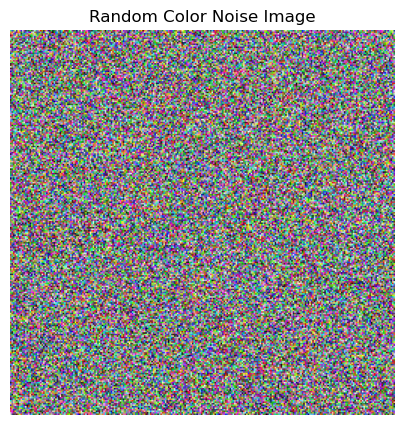

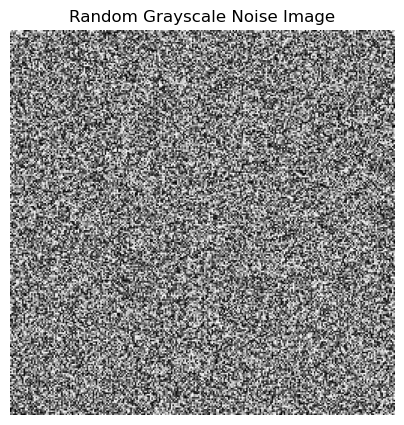

In [22]:
# Define the dimensions of the images
width = 256
height = 256
total_pixels = width * height

# Generate random noise for both color and grayscale images
color_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
gray_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)

# Display the color image
plt.figure(figsize=(5, 5))
plt.imshow(color_image)
plt.title('Random Color Noise Image')
plt.axis('off')
plt.show()

# Display the grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(gray_image, cmap='gray')
plt.title('Random Grayscale Noise Image')
plt.axis('off')
plt.show()

2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```

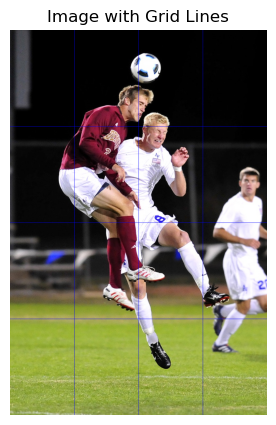

In [33]:
import cv2

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    
    # Get image dimensions
    height, width, _ = img.shape

    # Calculate the size of each patch
    patch_height = height // num_vertical_grid
    patch_width = width // num_horizontal_grid

    # Create a copy of the image to draw the grid lines
    img_with_grid = img.copy()

    # Draw vertical grid lines
    for i in range(1, num_horizontal_grid):
        x = i * patch_width
        cv2.line(img_with_grid, (x, 0), (x, height), line_color, 1)

    # Draw horizontal grid lines
    for i in range(1, num_vertical_grid):
        y = i * patch_height
        cv2.line(img_with_grid, (0, y), (width, y), line_color, 1)

    return img_with_grid

img_path = 'w4_Practical\Photo\images\soccer.jpg'
img = cv2.imread(img_path)

# Define grid parameters
num_horizontal_grid = 4
num_vertical_grid = 4
line_color = (255, 0, 0)  # Red color in BGR

# Apply the crop_grid function
img_with_grid = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

# Display the image with grids
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img_with_grid, cv2.COLOR_BGR2RGB))
plt.title('Image with Grid Lines')
plt.axis('off')
plt.show()


3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.

# 1. HSV 

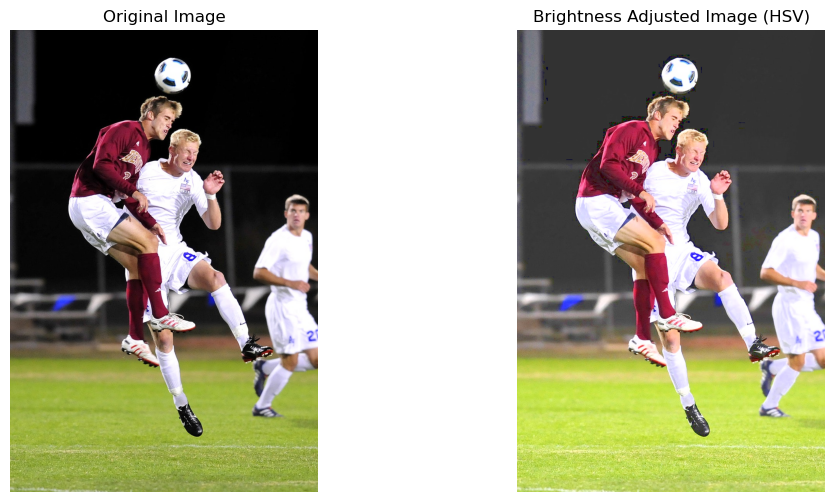

In [41]:
def adjust_brightness_hsv(img, value):
    """
    Adjust the brightness of an image by modifying the Value channel in HSV color space.
    """
    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    # Convert to float to avoid overflow/underflow
    v = v.astype(np.float32)
    v += value

    # Clip values to be in the valid range [0, 255]
    v = np.clip(v, 0, 255)
    v = v.astype(np.uint8)

    # Merge channels and convert back to BGR color space
    hsv = cv2.merge([h, s, v])
    img_bright_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return img_bright_hsv

img = cv2.imread('w4_Practical\Photo\images\soccer.jpg')

# Adjust brightness
brightness_value = 50  # Increase brightness
img_bright_hsv = adjust_brightness_hsv(img, brightness_value)

# Display the original and brightness-adjusted images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_bright_hsv, cv2.COLOR_BGR2RGB))
plt.title('Brightness Adjusted Image (HSV)')
plt.axis('off')

plt.show()


# 2. Pixel

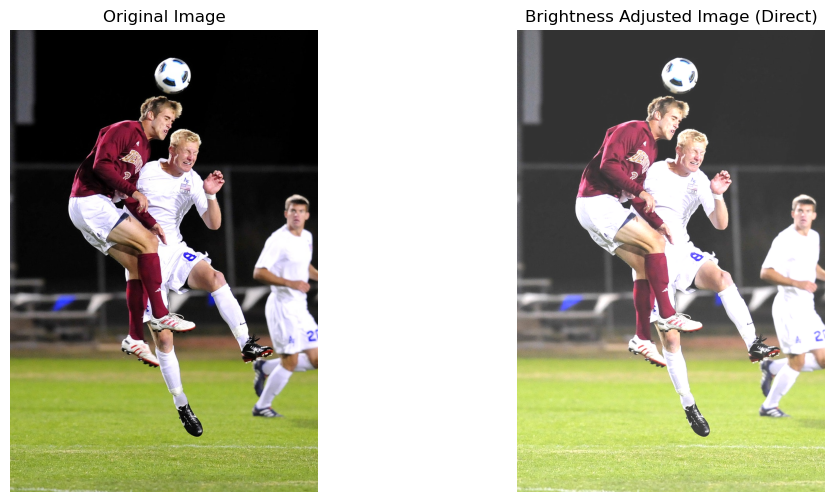

In [42]:
def adjust_brightness_direct(img, value):
    """
    Adjust the brightness of an image by adding a constant value to all pixel values.
    """
    # Convert to float to avoid overflow/underflow
    img_float = img.astype(np.float32)
    img_bright = img_float + value

    # Clip values to be in the valid range [0, 255]
    img_bright = np.clip(img_bright, 0, 255)

    return img_bright.astype(np.uint8)

img = cv2.imread('w4_Practical\Photo\images\soccer.jpg')

# Adjust brightness
brightness_value = 50  # Increase brightness
img_bright_direct = adjust_brightness_direct(img, brightness_value)

# Display the original and brightness-adjusted images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_bright_direct, cv2.COLOR_BGR2RGB))
plt.title('Brightness Adjusted Image (Direct)')
plt.axis('off')

plt.show() 

4. Provide at least one common use case(s) for the following color spaces:
    - RGB
    - HSV
    - CIELAB

### RGB (Red, Green, Blue)

Common Use Case: Display and Image Processing

- Display Devices: RGB is the primary color space used in display devices such as monitors, TVs, and cameras. Each pixel's color is represented by its red, green, and blue components, which correspond to the colors emitted by the display's subpixels.
```
- Image Processing: Many image processing operations, such as basic filtering, transformations, and simple manipulations, are performed in the RGB color space because it directly represents how colors are captured and displayed.

### HSV (Hue, Saturation, Value)

Common Use Case: Color-Based Image Segmentation and Adjustment

- Color Segmentation: HSV is widely used in computer vision tasks for color segmentation and object detection. The hue component represents the type of color, making it easier to separate objects based on color. For example, identifying all red objects in an image is more straightforward in HSV.
```
- Color Adjustment: Adjusting brightness and color in HSV is more intuitive. Modifying the Value (V) channel changes the brightness without affecting the color, and adjusting the Saturation (S) channel changes the color intensity, making it useful for photo editing and enhancing images.

### CIELAB 

Common Use Case: Color Difference Measurement and Perceptual Uniformity

- Color Difference Measurement: CIELAB is used for measuring color differences and ensuring color consistency in industries like printing, textiles, and automotive coatings. The Euclidean distance between two colors in the CIELAB space corresponds to perceptual differences, making it ideal for color quality control.
```
- Perceptual Uniformity: CIELAB is designed to be perceptually uniform, meaning that a given numerical change corresponds to a similar perceived change in color. This makes it useful for applications where accurate color reproduction is critical, such as digital imaging, color grading, and graphics design.